In [205]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [206]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/target.csv
/kaggle/input/train.csv
/kaggle/input/test.csv
/kaggle/input/submission_format.csv


In [207]:
train_features = pd.read_csv('/kaggle/input/train.csv')
train_labels = pd.read_csv('/kaggle/input/target.csv')
test_features = pd.read_csv('/kaggle/input/test.csv')
train_features.columns = train_features.columns.str.replace(r'[{}"\':,]', '_', regex=True)
test_features.columns = test_features.columns.str.replace(r'[{}"\':,]', '_', regex=True)

In [208]:
train_features['downloads'].unique()

array([nan, '50 - 100', '50000000 - 100000000', '1000 - 5000', '1 - 5',
       '100 - 500', '10000 - 50000', '50000 - 100000', '10 - 50',
       '5 - 10', '100000 - 500000', '5000 - 10000', '500 - 1000',
       '1000000 - 5000000', '0 - 1', '10000000 - 50000000',
       '500000 - 1000000', '1 - 1', '5000000 - 10000000', '10 - 1',
       '100000000 - 500000000', '5 - 1', '10000000000 - 15000000000',
       '500 - 1', '500000000 - 1000000000', '1000000000 - 5000000000',
       '50 - 1'], dtype=object)

In [209]:
# Melihat struktur data
print("Ukuran data train features:", train_features.shape)
print("Ukuran data train labels:", train_labels.shape)
print("Ukuran data test features:", test_features.shape)

Ukuran data train features: (7000, 16)
Ukuran data train labels: (7000, 1)
Ukuran data test features: (3000, 17)


In [210]:
# Melihat beberapa baris pertama dari data
train_features.describe()

,userRatingCount,isCorporateEmailScore,adSpent,appAge,averageUserRating
count,7.000000e+03,5872.000000,1.321000e+03,6950.000000,5768.000000
mean,3.256274e+04,45.740293,3.977563e+03,57.093060,2.482490
std,5.501431e+05,49.361215,9.219919e+04,37.169895,1.905712
min,0.000000e+00,0.000000,7.038525e-03,0.533333,0.000000
25%,0.000000e+00,0.000000,1.086920e+00,27.533333,0.000000
50%,1.000000e+00,0.000000,7.945580e+00,52.866667,3.000000
75%,8.800000e+01,99.000000,4.908375e+01,80.000000,4.000000
max,3.854334e+07,99.000000,3.143906e+06,196.466667,5.000000


In [211]:
train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   developerCountry                 7000 non-null   object 
 1   countryCode                      6936 non-null   object 
 2   userRatingCount                  7000 non-null   int64  
 3   primaryGenreName                 7000 non-null   object 
 4   downloads                        4851 non-null   object 
 5   deviceType                       7000 non-null   object 
 6   hasPrivacyLink                   6250 non-null   object 
 7   hasTermsOfServiceLink            2365 non-null   object 
 8   hasTermsOfServiceLinkRating      2365 non-null   object 
 9   isCorporateEmailScore            5872 non-null   float64
 10  adSpent                          1321 non-null   float64
 11  appAge                           6950 non-null   float64
 12  averageUserRating   

In [212]:
with pd.option_context('display.max_rows', None):
    print(train_features['appDescriptionBrandSafetyRating'].value_counts())

appDescriptionBrandSafetyRating
low       5652
medium     754
high       594
Name: count, dtype: int64


In [213]:
# Melihat beberapa baris pertama dari data
# test_features['appAge'] += 1.2
test_features.describe()

,ID,userRatingCount,isCorporateEmailScore,adSpent,appAge,averageUserRating
count,3000.000000,3.000000e+03,2560.000000,574.000000,2983.000000,2486.000000
mean,5016.298333,3.576905e+04,46.444922,286.612276,56.044396,2.490748
std,2894.991128,4.455556e+05,49.415285,1890.997697,36.417410,1.896230
min,1.000000,0.000000e+00,0.000000,0.007450,-1.200000,0.000000
25%,2495.750000,0.000000e+00,0.000000,1.121507,26.933333,0.000000
50%,4969.500000,1.000000e+00,0.000000,7.186537,51.933333,3.000000
75%,7585.500000,8.250000e+01,99.000000,44.878463,77.750000,4.000000
max,9999.000000,1.319941e+07,99.000000,37542.779693,194.466667,5.000000


In [214]:
print("\nSampel data train labels:")
print(train_labels.head())


Sampel data train labels:
   coppaRisk
0      False
1      False
2      False
3      False
4      False


In [215]:
## Penanganan Missing Values
# Mengganti string kosong dengan NaN
train_features.replace('', np.nan, inplace=True)
test_features.replace('', np.nan, inplace=True)

In [216]:
# Memeriksa missing values
missing_percentage = train_features.isnull().mean() * 100
print("\nPersentase missing values per kolom:")
print(missing_percentage.sort_values(ascending=False))


Persentase missing values per kolom:
appContentBrandSafetyRating        88.028571
adSpent                            81.128571
hasTermsOfServiceLink              66.214286
hasTermsOfServiceLinkRating        66.214286
downloads                          30.700000
averageUserRating                  17.600000
isCorporateEmailScore              16.114286
hasPrivacyLink                     10.714286
countryCode                         0.914286
appAge                              0.714286
developerCountry                    0.000000
userRatingCount                     0.000000
primaryGenreName                    0.000000
deviceType                          0.000000
appDescriptionBrandSafetyRating     0.000000
mfaRating                           0.000000
dtype: float64


In [217]:
train_idx = train_features.index
test_idx = test_features.index

# Tambahkan label untuk membedakan data pelatihan dan pengujian
train_features['is_train'] = True
test_features['is_train'] = False

# Gabungkan dataset
all_df = pd.concat([train_features, test_features], axis=0)

import pandas as pd

def rare_encoding(series: pd.Series, threshold: float = 0.1, others_label: str = 'others') -> pd.Series:
    # Compute normalized frequency of each category (exclude NaN)
    freq = series.value_counts(normalize=True)
    # Identify rare labels
    rare_labels = freq[freq < threshold].index
    # Map series values to either itself or others_label
    encoded = series.where(~series.isin(rare_labels), other=others_label)
    # Optionally fill NaNs with others_label
    return encoded

cols = ['developerCountry']
for col in cols:
    all_df[col] = rare_encoding(all_df[col], threshold=0.1)

train_features = all_df[all_df['is_train']].drop(columns=['is_train'])
test_features  = all_df[~all_df['is_train']].drop(columns=['is_train'])

# 6. Kembalikan indeks asli
train_features.index = train_idx
test_features.index  = test_idx

In [218]:
# Menghapus fitur dengan missing values lebih dari 30%
threshold = 50
high_missing_cols = missing_percentage[missing_percentage > threshold].index
print(f"\nKolom dengan missing values lebih dari {threshold}%:")
print(high_missing_cols.tolist())


Kolom dengan missing values lebih dari 50%:
['hasTermsOfServiceLink', 'hasTermsOfServiceLinkRating', 'adSpent', 'appContentBrandSafetyRating']


In [219]:
# Menghapus fitur dengan missing values tinggi
train_features_cleaned = train_features.drop(columns=high_missing_cols)
test_features_cleaned = test_features.drop(columns=high_missing_cols)

print("\nUkuran data train setelah menghapus kolom dengan missing values tinggi:", train_features_cleaned.shape)


Ukuran data train setelah menghapus kolom dengan missing values tinggi: (7000, 13)


In [220]:
## Preprocessing Data
# Memeriksa missing values yang tersisa
missing_percentage_after = train_features_cleaned.isnull().mean() * 100
print("\nPersentase missing values per kolom setelah pembersihan:")
print(missing_percentage_after.sort_values(ascending=False))


Persentase missing values per kolom setelah pembersihan:
ID                                 100.000000
downloads                           30.700000
averageUserRating                   17.600000
isCorporateEmailScore               16.114286
hasPrivacyLink                      10.714286
countryCode                          0.914286
appAge                               0.714286
developerCountry                     0.000000
userRatingCount                      0.000000
primaryGenreName                     0.000000
deviceType                           0.000000
appDescriptionBrandSafetyRating      0.000000
mfaRating                            0.000000
dtype: float64


In [221]:
# 1) Gabungkan train & test untuk perhitungan
combined = pd.concat(
    [train_features_cleaned, test_features_cleaned],
    axis=0,
    ignore_index=True
)

# 2) Hitung median untuk numeric dan mode untuk categorical dari 'combined' dan simpan dalam dict agar bisa pakai ulang
median_values = {}
for col in combined.select_dtypes(include=['int64', 'float64']).columns:
    if col != 'ID':
        median_values[col] = combined[col].median()

mode_values = {}
for col in combined.select_dtypes(include=['object', 'category']).columns:
    # .mode() bisa menghasilkan Series, ambil elemen pertama
    if col != 'ID':
        mode_values[col] = combined[col].mode()[0]

In [222]:
# 3) Isi missing values di train & test
for col, med in median_values.items():
    train_features_cleaned[col].fillna(med, inplace=True)
    test_features_cleaned[col].fillna(med, inplace=True)

for col, mod in mode_values.items():
    train_features_cleaned[col].fillna(mod, inplace=True)
    test_features_cleaned[col].fillna(mod, inplace=True)

/tmp/ipykernel_31/2355159081.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_features_cleaned[col].fillna(med, inplace=True)
/tmp/ipykernel_31/2355159081.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [223]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = train_features_cleaned.select_dtypes(include=['object', 'category']).columns
for col in categorical_cols:
    le = LabelEncoder()
    # Gabungkan, lalu paksa jadi string
    combined = pd.concat(
        [train_features_cleaned[col], test_features_cleaned[col]],
        axis=0
    ).astype(str)

    le.fit(combined)  # kelas diambil dari 'combined' yang sudah seragam
    train_features_cleaned[col] = le.transform(train_features_cleaned[col].astype(str))
    test_features_cleaned[col]  = le.transform(test_features_cleaned[col].astype(str))

In [224]:
# saya telah menggabungkan kode anda dengan kode saya terkait modellung tapi ada error yang muncul

# kode anda:
import pandas as pd
import numpy as np
import warnings
from inspect import isclass, signature
import os

# ----------------------------------------
# 1) UTILITAS DARI KODE1 (ColumnSchema, PrimitiveBase, AggregationPrimitive)
# ----------------------------------------

# --- DuplicateTagsWarning & StandardTagsChangedWarning ---
class DuplicateTagsWarning(UserWarning):
    def get_warning_message(self, duplicate_tags, name):
        return f"Semantic tag(s) '{', '.join(duplicate_tags)}' already present on column '{name}'"

class StandardTagsChangedWarning(UserWarning):
    def get_warning_message(self, use_standard_tags, col_name=None):
        changed = "added to" if use_standard_tags else "removed from"
        name = (f'"{col_name}"') if col_name is not None else "your column"
        return f"Standard tags have been {changed} {name}"

# --- _convert_input_to_set + helper validation ---
def _validate_tags_input_type(semantic_tags, error_language):
    if type(semantic_tags) not in (list, set, str):
        raise TypeError(f"{error_language} must be a string, set or list")

def _validate_string_tags(semantic_tags, error_language):
    if not all(isinstance(tag, str) for tag in semantic_tags):
        raise TypeError(f"{error_language} must contain only strings")

def _convert_input_to_set(semantic_tags, error_language="semantic_tags", validate=True):
    if not semantic_tags:
        return set()
    if validate:
        _validate_tags_input_type(semantic_tags, error_language)
    if isinstance(semantic_tags, str):
        return {semantic_tags}
    if isinstance(semantic_tags, list):
        semantic_tags = set(semantic_tags)
    if validate:
        _validate_string_tags(semantic_tags, error_language)
    return semantic_tags

# --- ColumnSchema (dipangkas untuk fokus ke semantic_tags & logical_type) ---
class ColumnSchema:
    def __init__(
        self,
        logical_type=None,
        semantic_tags=None,
        use_standard_tags=False,
    ):
        from woodwork.logical_types import Boolean, BooleanNullable, Datetime, LatLong, NaturalLanguage, Ordinal, Unknown
        # simpan
        self.logical_type = logical_type() if isclass(logical_type) else logical_type
        self.use_standard_tags = use_standard_tags
        # bangun semantic_tags
        tags = _convert_input_to_set(semantic_tags, validate=True)
        if self.use_standard_tags and self.logical_type is not None:
            tags = tags.union(self.logical_type.standard_tags)
        self.semantic_tags = tags

# --- convert_to_nth (diperlukan di PrimitiveBase) ---
def convert_to_nth(integer):
    string_nth = str(integer)
    end_int = integer % 10
    if end_int == 1 and integer % 100 != 11:
        return f"{integer}st"
    elif end_int == 2 and integer % 100 != 12:
        return f"{integer}nd"
    elif end_int == 3 and integer % 100 != 13:
        return f"{integer}rd"
    else:
        return f"{integer}th"

# --- PrimitiveBase & AggregationPrimitive ---
class PrimitiveBase:
    name = None
    input_types = None
    return_type = None
    default_value = np.nan
    number_output_features = 1
    description_template = None

    def __call__(self, arg_series):
        # terima list/array, bungkus jadi Series
        s = pd.Series(arg_series)
        func = getattr(self, "_method", None) or self.get_function()
        # cache fungsi
        self._method = func
        return func(s)

    def get_function(self):
        raise NotImplementedError

    def get_args_string(self):
        args = []
        for n, v in zip(self.__class__.__init__.__defaults__ or [], []):
            pass
        return ""

class AggregationPrimitive(PrimitiveBase):
    def generate_name(self, col_name, agg_name):
        return f"{agg_name.upper()}({col_name})"

# ----------------------------------------
# 2) AGGREGATION PRIMITIVES: Count, Min, Max
# ----------------------------------------
class Count(AggregationPrimitive):
    name = "count"
    def get_function(self):
        return pd.Series.count

class Min(AggregationPrimitive):
    name = "min"
    def get_function(self):
        return np.min

class Max(AggregationPrimitive):
    name = "max"
    def get_function(self):
        return np.max

class Mean(AggregationPrimitive):
    name = "mean"
    def get_function(self):
        return np.mean

class Sum(AggregationPrimitive):
    name = "mean"
    def get_function(self):
        return np.sum

class Std(AggregationPrimitive):
    name = "std"
    def get_function(self):
        return np.std


# ----------------------------------------
# 3) LOAD & SIAPKAN DATA
# ----------------------------------------
# 1) Siapkan data
train_df = train_features_cleaned.copy()
target_df = pd.read_csv('/kaggle/input/target.csv',
                        header=None, names=['coppaRisk'])
train_df['coppaRisk'] = target_df['coppaRisk']

numeric_cols = train_df.select_dtypes(include=[np.number]).columns

# 2) Genre
group_col = 'primaryGenreName'
agg_dict = {}
for col in numeric_cols:
    agg_dict[f"{group_col.upper()}_MAX_{col}"]   = (col, lambda s, f=Max():   f(s))
    agg_dict[f"{group_col.upper()}_MIN_{col}"]   = (col, lambda s, f=Min():   f(s))
    agg_dict[f"{group_col.upper()}_COUNT_{col}"] = (col, lambda s, f=Count(): f(s))
    agg_dict[f"{group_col.upper()}_SUM_{col}"] = (col, lambda s, f=Sum(): f(s))
    agg_dict[f"{group_col.upper()}_MEAN_{col}"] = (col, lambda s, f=Mean(): f(s))
    agg_dict[f"{group_col.upper()}_STD_{col}"] = (col, lambda s, f=Std(): f(s))

genre_feats = (
    train_df
      .groupby(group_col)
      .agg(**agg_dict)
      .reset_index()
)

# 3) Content Rating
group_col2 = 'appDescriptionBrandSafetyRating'
agg_dict = {}
for col in numeric_cols:
    agg_dict[f"{group_col2.upper()}_MAX_{col}"]   = (col, lambda s, f=Max():   f(s))
    agg_dict[f"{group_col2.upper()}_MIN_{col}"]   = (col, lambda s, f=Min():   f(s))
    agg_dict[f"{group_col2.upper()}_COUNT_{col}"] = (col, lambda s, f=Count(): f(s))
    agg_dict[f"{group_col2.upper()}_SUM_{col}"] = (col, lambda s, f=Sum(): f(s))
    agg_dict[f"{group_col2.upper()}_MEAN_{col}"] = (col, lambda s, f=Mean(): f(s))
    agg_dict[f"{group_col2.upper()}_STD_{col}"] = (col, lambda s, f=Std(): f(s))

content_feats = (
    train_df
      .groupby(group_col2)
      .agg(**agg_dict)
      .reset_index()
)

# 4) Merge & simpan
df = (
    train_df
      .merge(genre_feats,   on=group_col,  how='left')
      .merge(content_feats, on=group_col2, how='left')
      .reset_index(drop=True)
)

print(f"Created {df.shape[1]} features, {df.shape[0]} rows")
df.to_csv('new_feature_matrix_no_ft.csv', index=False)


Created 158 features, 7000 rows


In [225]:
train_labels.value_counts()

coppaRisk
False        6304
True          696
Name: count, dtype: int64

In [251]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from xgboost import XGBClassifier
import numpy as np

# Inisialisasi model dengan parameter XGB yang sudah kamu pakai
xgb_params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'learning_rate': 0.05,
    'max_depth': 5,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'random_state': 42
}

model = XGBClassifier(**xgb_params)

# Siapkan StratifiedKFold dengan 5 split
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cols = ['PRIMARYGENRENAME_COUNT_developerCountry',
       'PRIMARYGENRENAME_COUNT_countryCode',
       'PRIMARYGENRENAME_SUM_developerCountry',
       'APPDESCRIPTIONBRANDSAFETYRATING_COUNT_developerCountry',
       'APPDESCRIPTIONBRANDSAFETYRATING_SUM_developerCountry',
       'PRIMARYGENRENAME_SUM_countryCode', 'PRIMARYGENRENAME_SUM_downloads',
       'appDescriptionBrandSafetyRating',
       'PRIMARYGENRENAME_SUM_averageUserRating',
       'PRIMARYGENRENAME_SUM_userRatingCount',
       'PRIMARYGENRENAME_SUM_appDescriptionBrandSafetyRating',
       'isCorporateEmailScore', 'userRatingCount',
       'PRIMARYGENRENAME_MAX_userRatingCount',
       'PRIMARYGENRENAME_SUM_isCorporateEmailScore',
       'PRIMARYGENRENAME_MIN_downloads', 'PRIMARYGENRENAME_STD_deviceType',
       'deviceType', 'PRIMARYGENRENAME_MEAN_isCorporateEmailScore',
       'PRIMARYGENRENAME_STD_isCorporateEmailScore', 'countryCode',
       'developerCountry', 'averageUserRating', 'downloads',
       'PRIMARYGENRENAME_MEAN_developerCountry', 'appAge',
       'PRIMARYGENRENAME_MAX_countryCode', 'PRIMARYGENRENAME_MEAN_appAge',
       'PRIMARYGENRENAME_MIN_countryCode', 'PRIMARYGENRENAME_STD_mfaRating',
       'PRIMARYGENRENAME_MAX_appDescriptionBrandSafetyRating',
       'APPDESCRIPTIONBRANDSAFETYRATING_STD_developerCountry',
       'PRIMARYGENRENAME_MIN_appDescriptionBrandSafetyRating',
       'hasPrivacyLink', 'PRIMARYGENRENAME_MEAN_deviceType',
       'PRIMARYGENRENAME_SUM_primaryGenreName',
       'PRIMARYGENRENAME_MEAN_downloads',
       'PRIMARYGENRENAME_MEAN_averageUserRating',
       'PRIMARYGENRENAME_STD_appAge', 'PRIMARYGENRENAME_STD_developerCountry',
       'PRIMARYGENRENAME_MIN_primaryGenreName', 'primaryGenreName',
       'PRIMARYGENRENAME_MAX_averageUserRating',
       'PRIMARYGENRENAME_MAX_isCorporateEmailScore',
       'PRIMARYGENRENAME_STD_userRatingCount', 'PRIMARYGENRENAME_MIN_appAge',
       'PRIMARYGENRENAME_MAX_developerCountry',
       'PRIMARYGENRENAME_MAX_downloads',
       'APPDESCRIPTIONBRANDSAFETYRATING_MEAN_developerCountry',
       'PRIMARYGENRENAME_MAX_primaryGenreName']
roc_auc_scores = []
X =df[cols]

y = train_labels.iloc[:, 0]
# X_train, X_val, y_train, y_val = train_test_split(
#     train_features_cleaned, train_labels.iloc[:, 0], 
#     test_size=0.2, random_state=42, stratify=train_labels.iloc[:, 0]
# )
# Loop tiap fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_tr, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_tr, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # Latih model
    model.fit(X_tr, y_tr)

    # Prediksi probabilitas kelas positif
    y_val_proba = model.predict_proba(X_val)[:, 1]

    # Hitung ROC AUC
    score = roc_auc_score(y_val, y_val_proba)
    roc_auc_scores.append(score)

    print(f"Fold {fold:2d} — ROC AUC: {score:.4f}")

# Rata‑rata dan std dari ROC AUC di 10 fold
mean_auc = np.mean(roc_auc_scores)
std_auc  = np.std(roc_auc_scores)
print(f"\nMean ROC AUC over 10 folds : {mean_auc:.4f} ± {std_auc:.4f}")

Fold  1 — ROC AUC: 0.8826
Fold  2 — ROC AUC: 0.8988
Fold  3 — ROC AUC: 0.8956
Fold  4 — ROC AUC: 0.8874
Fold  5 — ROC AUC: 0.8865

Mean ROC AUC over 10 folds : 0.8902 ± 0.0060


In [241]:
len(X.columns)

156

In [227]:
## Evaluasi Model
# Mendapatkan prediksi probabilitas dan kelas
y_val_pred_proba = model.predict_proba(X_val)[:, 1]  # Probabilitas kelas positif
y_val_pred = model.predict(X_val)

In [228]:
# Mengevaluasi model
roc_auc = roc_auc_score(y_val, y_val_pred_proba)
accuracy = accuracy_score(y_val, y_val_pred)

print(f"\nROC AUC Score: {roc_auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")


ROC AUC Score: 0.8872
Accuracy: 0.9036


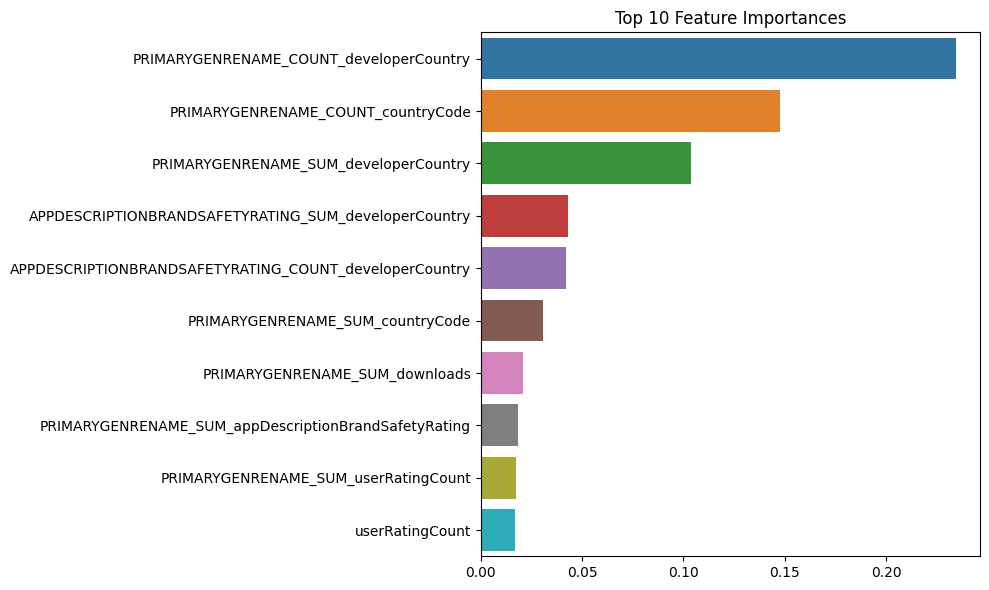

Index(['PRIMARYGENRENAME_COUNT_developerCountry',
       'PRIMARYGENRENAME_COUNT_countryCode',
       'PRIMARYGENRENAME_SUM_developerCountry',
       'APPDESCRIPTIONBRANDSAFETYRATING_SUM_developerCountry',
       'APPDESCRIPTIONBRANDSAFETYRATING_COUNT_developerCountry',
       'PRIMARYGENRENAME_SUM_countryCode', 'PRIMARYGENRENAME_SUM_downloads',
       'PRIMARYGENRENAME_SUM_appDescriptionBrandSafetyRating',
       'PRIMARYGENRENAME_SUM_userRatingCount', 'userRatingCount',
       'PRIMARYGENRENAME_MIN_downloads',
       'PRIMARYGENRENAME_STD_userRatingCount', 'isCorporateEmailScore',
       'PRIMARYGENRENAME_STD_isCorporateEmailScore',
       'PRIMARYGENRENAME_SUM_isCorporateEmailScore', 'deviceType',
       'PRIMARYGENRENAME_SUM_averageUserRating',
       'PRIMARYGENRENAME_MIN_appDescriptionBrandSafetyRating',
       'PRIMARYGENRENAME_MEAN_deviceType', 'PRIMARYGENRENAME_MAX_downloads',
       'developerCountry', 'countryCode', 'appAge', 'downloads',
       'appDescriptionBrandSafetyRat

In [249]:
## Analisis Feature Importance
# Mendapatkan feature importance
feature_importance = model.feature_importances_
feature_names = X.columns

# Menampilkan feature importance
plt.figure(figsize=(10, 6))
importances = pd.Series(feature_importance, index=feature_names).sort_values(ascending=False)
sns.barplot(x=importances.values[:10], y=importances.index[:10])
plt.title('Top 10 Feature Importances')
plt.tight_layout()
plt.show()

print(importances.index[:50])

In [230]:
train_features_cleaned.columns

Index(['developerCountry', 'countryCode', 'userRatingCount',
       'primaryGenreName', 'downloads', 'deviceType', 'hasPrivacyLink',
       'isCorporateEmailScore', 'appAge', 'averageUserRating',
       'appDescriptionBrandSafetyRating', 'mfaRating', 'ID'],
      dtype='object')

In [231]:
## Prediksi dan Pembuatan File Submission

# Prediksi pada data test
if 'ID' in test_features_cleaned.columns:
    id_test = test_features_cleaned['ID']
    test_features_cleaned = test_features_cleaned.drop(columns=['ID'])
test_predictions_proba = model.predict_proba(test_features_cleaned)[:, 1]
test_predictions = model.predict(test_features_cleaned)

# Mengonversi prediksi boolean ke string untuk format submission
test_predictions_str = ["True" if pred else "False" for pred in test_predictions]

# Membuat submission file
submission = pd.DataFrame({
    'ID': id_test,
    'coppaRisk': test_predictions_proba
})

# Melihat format submission
print("\nFormat submission:")
print(submission.head())

submission.to_csv('submission.csv', index=False)

print("\nFile submission telah dibuat.")

ValueError: feature_names mismatch: ['developerCountry', 'countryCode', 'userRatingCount', 'primaryGenreName', 'downloads', 'deviceType', 'hasPrivacyLink', 'isCorporateEmailScore', 'appAge', 'averageUserRating', 'appDescriptionBrandSafetyRating', 'mfaRating', 'PRIMARYGENRENAME_MAX_developerCountry', 'PRIMARYGENRENAME_MIN_developerCountry', 'PRIMARYGENRENAME_COUNT_developerCountry', 'PRIMARYGENRENAME_SUM_developerCountry', 'PRIMARYGENRENAME_MEAN_developerCountry', 'PRIMARYGENRENAME_STD_developerCountry', 'PRIMARYGENRENAME_MAX_countryCode', 'PRIMARYGENRENAME_MIN_countryCode', 'PRIMARYGENRENAME_COUNT_countryCode', 'PRIMARYGENRENAME_SUM_countryCode', 'PRIMARYGENRENAME_MEAN_countryCode', 'PRIMARYGENRENAME_STD_countryCode', 'PRIMARYGENRENAME_MAX_userRatingCount', 'PRIMARYGENRENAME_MIN_userRatingCount', 'PRIMARYGENRENAME_COUNT_userRatingCount', 'PRIMARYGENRENAME_SUM_userRatingCount', 'PRIMARYGENRENAME_MEAN_userRatingCount', 'PRIMARYGENRENAME_STD_userRatingCount', 'PRIMARYGENRENAME_MAX_primaryGenreName', 'PRIMARYGENRENAME_MIN_primaryGenreName', 'PRIMARYGENRENAME_COUNT_primaryGenreName', 'PRIMARYGENRENAME_SUM_primaryGenreName', 'PRIMARYGENRENAME_MEAN_primaryGenreName', 'PRIMARYGENRENAME_STD_primaryGenreName', 'PRIMARYGENRENAME_MAX_downloads', 'PRIMARYGENRENAME_MIN_downloads', 'PRIMARYGENRENAME_COUNT_downloads', 'PRIMARYGENRENAME_SUM_downloads', 'PRIMARYGENRENAME_MEAN_downloads', 'PRIMARYGENRENAME_STD_downloads', 'PRIMARYGENRENAME_MAX_deviceType', 'PRIMARYGENRENAME_MIN_deviceType', 'PRIMARYGENRENAME_COUNT_deviceType', 'PRIMARYGENRENAME_SUM_deviceType', 'PRIMARYGENRENAME_MEAN_deviceType', 'PRIMARYGENRENAME_STD_deviceType', 'PRIMARYGENRENAME_MAX_isCorporateEmailScore', 'PRIMARYGENRENAME_MIN_isCorporateEmailScore', 'PRIMARYGENRENAME_COUNT_isCorporateEmailScore', 'PRIMARYGENRENAME_SUM_isCorporateEmailScore', 'PRIMARYGENRENAME_MEAN_isCorporateEmailScore', 'PRIMARYGENRENAME_STD_isCorporateEmailScore', 'PRIMARYGENRENAME_MAX_appAge', 'PRIMARYGENRENAME_MIN_appAge', 'PRIMARYGENRENAME_COUNT_appAge', 'PRIMARYGENRENAME_SUM_appAge', 'PRIMARYGENRENAME_MEAN_appAge', 'PRIMARYGENRENAME_STD_appAge', 'PRIMARYGENRENAME_MAX_averageUserRating', 'PRIMARYGENRENAME_MIN_averageUserRating', 'PRIMARYGENRENAME_COUNT_averageUserRating', 'PRIMARYGENRENAME_SUM_averageUserRating', 'PRIMARYGENRENAME_MEAN_averageUserRating', 'PRIMARYGENRENAME_STD_averageUserRating', 'PRIMARYGENRENAME_MAX_appDescriptionBrandSafetyRating', 'PRIMARYGENRENAME_MIN_appDescriptionBrandSafetyRating', 'PRIMARYGENRENAME_COUNT_appDescriptionBrandSafetyRating', 'PRIMARYGENRENAME_SUM_appDescriptionBrandSafetyRating', 'PRIMARYGENRENAME_MEAN_appDescriptionBrandSafetyRating', 'PRIMARYGENRENAME_STD_appDescriptionBrandSafetyRating', 'PRIMARYGENRENAME_MAX_mfaRating', 'PRIMARYGENRENAME_MIN_mfaRating', 'PRIMARYGENRENAME_COUNT_mfaRating', 'PRIMARYGENRENAME_SUM_mfaRating', 'PRIMARYGENRENAME_MEAN_mfaRating', 'PRIMARYGENRENAME_STD_mfaRating', 'PRIMARYGENRENAME_MAX_ID', 'PRIMARYGENRENAME_MIN_ID', 'PRIMARYGENRENAME_COUNT_ID', 'PRIMARYGENRENAME_SUM_ID', 'PRIMARYGENRENAME_MEAN_ID', 'PRIMARYGENRENAME_STD_ID', 'APPDESCRIPTIONBRANDSAFETYRATING_MAX_developerCountry', 'APPDESCRIPTIONBRANDSAFETYRATING_MIN_developerCountry', 'APPDESCRIPTIONBRANDSAFETYRATING_COUNT_developerCountry', 'APPDESCRIPTIONBRANDSAFETYRATING_SUM_developerCountry', 'APPDESCRIPTIONBRANDSAFETYRATING_MEAN_developerCountry', 'APPDESCRIPTIONBRANDSAFETYRATING_STD_developerCountry', 'APPDESCRIPTIONBRANDSAFETYRATING_MAX_countryCode', 'APPDESCRIPTIONBRANDSAFETYRATING_MIN_countryCode', 'APPDESCRIPTIONBRANDSAFETYRATING_COUNT_countryCode', 'APPDESCRIPTIONBRANDSAFETYRATING_SUM_countryCode', 'APPDESCRIPTIONBRANDSAFETYRATING_MEAN_countryCode', 'APPDESCRIPTIONBRANDSAFETYRATING_STD_countryCode', 'APPDESCRIPTIONBRANDSAFETYRATING_MAX_userRatingCount', 'APPDESCRIPTIONBRANDSAFETYRATING_MIN_userRatingCount', 'APPDESCRIPTIONBRANDSAFETYRATING_COUNT_userRatingCount', 'APPDESCRIPTIONBRANDSAFETYRATING_SUM_userRatingCount', 'APPDESCRIPTIONBRANDSAFETYRATING_MEAN_userRatingCount', 'APPDESCRIPTIONBRANDSAFETYRATING_STD_userRatingCount', 'APPDESCRIPTIONBRANDSAFETYRATING_MAX_primaryGenreName', 'APPDESCRIPTIONBRANDSAFETYRATING_MIN_primaryGenreName', 'APPDESCRIPTIONBRANDSAFETYRATING_COUNT_primaryGenreName', 'APPDESCRIPTIONBRANDSAFETYRATING_SUM_primaryGenreName', 'APPDESCRIPTIONBRANDSAFETYRATING_MEAN_primaryGenreName', 'APPDESCRIPTIONBRANDSAFETYRATING_STD_primaryGenreName', 'APPDESCRIPTIONBRANDSAFETYRATING_MAX_downloads', 'APPDESCRIPTIONBRANDSAFETYRATING_MIN_downloads', 'APPDESCRIPTIONBRANDSAFETYRATING_COUNT_downloads', 'APPDESCRIPTIONBRANDSAFETYRATING_SUM_downloads', 'APPDESCRIPTIONBRANDSAFETYRATING_MEAN_downloads', 'APPDESCRIPTIONBRANDSAFETYRATING_STD_downloads', 'APPDESCRIPTIONBRANDSAFETYRATING_MAX_deviceType', 'APPDESCRIPTIONBRANDSAFETYRATING_MIN_deviceType', 'APPDESCRIPTIONBRANDSAFETYRATING_COUNT_deviceType', 'APPDESCRIPTIONBRANDSAFETYRATING_SUM_deviceType', 'APPDESCRIPTIONBRANDSAFETYRATING_MEAN_deviceType', 'APPDESCRIPTIONBRANDSAFETYRATING_STD_deviceType', 'APPDESCRIPTIONBRANDSAFETYRATING_MAX_isCorporateEmailScore', 'APPDESCRIPTIONBRANDSAFETYRATING_MIN_isCorporateEmailScore', 'APPDESCRIPTIONBRANDSAFETYRATING_COUNT_isCorporateEmailScore', 'APPDESCRIPTIONBRANDSAFETYRATING_SUM_isCorporateEmailScore', 'APPDESCRIPTIONBRANDSAFETYRATING_MEAN_isCorporateEmailScore', 'APPDESCRIPTIONBRANDSAFETYRATING_STD_isCorporateEmailScore', 'APPDESCRIPTIONBRANDSAFETYRATING_MAX_appAge', 'APPDESCRIPTIONBRANDSAFETYRATING_MIN_appAge', 'APPDESCRIPTIONBRANDSAFETYRATING_COUNT_appAge', 'APPDESCRIPTIONBRANDSAFETYRATING_SUM_appAge', 'APPDESCRIPTIONBRANDSAFETYRATING_MEAN_appAge', 'APPDESCRIPTIONBRANDSAFETYRATING_STD_appAge', 'APPDESCRIPTIONBRANDSAFETYRATING_MAX_averageUserRating', 'APPDESCRIPTIONBRANDSAFETYRATING_MIN_averageUserRating', 'APPDESCRIPTIONBRANDSAFETYRATING_COUNT_averageUserRating', 'APPDESCRIPTIONBRANDSAFETYRATING_SUM_averageUserRating', 'APPDESCRIPTIONBRANDSAFETYRATING_MEAN_averageUserRating', 'APPDESCRIPTIONBRANDSAFETYRATING_STD_averageUserRating', 'APPDESCRIPTIONBRANDSAFETYRATING_MAX_appDescriptionBrandSafetyRating', 'APPDESCRIPTIONBRANDSAFETYRATING_MIN_appDescriptionBrandSafetyRating', 'APPDESCRIPTIONBRANDSAFETYRATING_COUNT_appDescriptionBrandSafetyRating', 'APPDESCRIPTIONBRANDSAFETYRATING_SUM_appDescriptionBrandSafetyRating', 'APPDESCRIPTIONBRANDSAFETYRATING_MEAN_appDescriptionBrandSafetyRating', 'APPDESCRIPTIONBRANDSAFETYRATING_STD_appDescriptionBrandSafetyRating', 'APPDESCRIPTIONBRANDSAFETYRATING_MAX_mfaRating', 'APPDESCRIPTIONBRANDSAFETYRATING_MIN_mfaRating', 'APPDESCRIPTIONBRANDSAFETYRATING_COUNT_mfaRating', 'APPDESCRIPTIONBRANDSAFETYRATING_SUM_mfaRating', 'APPDESCRIPTIONBRANDSAFETYRATING_MEAN_mfaRating', 'APPDESCRIPTIONBRANDSAFETYRATING_STD_mfaRating', 'APPDESCRIPTIONBRANDSAFETYRATING_MAX_ID', 'APPDESCRIPTIONBRANDSAFETYRATING_MIN_ID', 'APPDESCRIPTIONBRANDSAFETYRATING_COUNT_ID', 'APPDESCRIPTIONBRANDSAFETYRATING_SUM_ID', 'APPDESCRIPTIONBRANDSAFETYRATING_MEAN_ID', 'APPDESCRIPTIONBRANDSAFETYRATING_STD_ID'] ['developerCountry', 'countryCode', 'userRatingCount', 'primaryGenreName', 'downloads', 'deviceType', 'hasPrivacyLink', 'isCorporateEmailScore', 'appAge', 'averageUserRating', 'appDescriptionBrandSafetyRating', 'mfaRating']
expected APPDESCRIPTIONBRANDSAFETYRATING_STD_userRatingCount, PRIMARYGENRENAME_SUM_appDescriptionBrandSafetyRating, APPDESCRIPTIONBRANDSAFETYRATING_MIN_primaryGenreName, PRIMARYGENRENAME_STD_developerCountry, APPDESCRIPTIONBRANDSAFETYRATING_MEAN_developerCountry, PRIMARYGENRENAME_MIN_primaryGenreName, PRIMARYGENRENAME_COUNT_appAge, PRIMARYGENRENAME_STD_appAge, PRIMARYGENRENAME_MEAN_appDescriptionBrandSafetyRating, PRIMARYGENRENAME_STD_deviceType, APPDESCRIPTIONBRANDSAFETYRATING_SUM_developerCountry, PRIMARYGENRENAME_MAX_developerCountry, APPDESCRIPTIONBRANDSAFETYRATING_COUNT_appDescriptionBrandSafetyRating, APPDESCRIPTIONBRANDSAFETYRATING_MEAN_ID, PRIMARYGENRENAME_COUNT_appDescriptionBrandSafetyRating, PRIMARYGENRENAME_STD_isCorporateEmailScore, APPDESCRIPTIONBRANDSAFETYRATING_COUNT_averageUserRating, PRIMARYGENRENAME_SUM_appAge, APPDESCRIPTIONBRANDSAFETYRATING_COUNT_mfaRating, PRIMARYGENRENAME_COUNT_primaryGenreName, PRIMARYGENRENAME_MAX_countryCode, PRIMARYGENRENAME_MAX_appAge, PRIMARYGENRENAME_COUNT_mfaRating, APPDESCRIPTIONBRANDSAFETYRATING_MAX_deviceType, PRIMARYGENRENAME_MEAN_userRatingCount, PRIMARYGENRENAME_MAX_primaryGenreName, APPDESCRIPTIONBRANDSAFETYRATING_MEAN_userRatingCount, APPDESCRIPTIONBRANDSAFETYRATING_STD_appAge, APPDESCRIPTIONBRANDSAFETYRATING_MAX_isCorporateEmailScore, APPDESCRIPTIONBRANDSAFETYRATING_MAX_userRatingCount, PRIMARYGENRENAME_STD_averageUserRating, APPDESCRIPTIONBRANDSAFETYRATING_MEAN_downloads, PRIMARYGENRENAME_MIN_appDescriptionBrandSafetyRating, PRIMARYGENRENAME_MAX_downloads, APPDESCRIPTIONBRANDSAFETYRATING_SUM_primaryGenreName, PRIMARYGENRENAME_SUM_deviceType, APPDESCRIPTIONBRANDSAFETYRATING_MIN_ID, APPDESCRIPTIONBRANDSAFETYRATING_MEAN_appDescriptionBrandSafetyRating, PRIMARYGENRENAME_MIN_countryCode, APPDESCRIPTIONBRANDSAFETYRATING_STD_averageUserRating, APPDESCRIPTIONBRANDSAFETYRATING_MEAN_mfaRating, PRIMARYGENRENAME_MIN_ID, APPDESCRIPTIONBRANDSAFETYRATING_MAX_primaryGenreName, PRIMARYGENRENAME_SUM_downloads, PRIMARYGENRENAME_MAX_userRatingCount, APPDESCRIPTIONBRANDSAFETYRATING_SUM_appAge, APPDESCRIPTIONBRANDSAFETYRATING_SUM_appDescriptionBrandSafetyRating, PRIMARYGENRENAME_MIN_mfaRating, PRIMARYGENRENAME_MAX_ID, APPDESCRIPTIONBRANDSAFETYRATING_MIN_isCorporateEmailScore, APPDESCRIPTIONBRANDSAFETYRATING_MEAN_deviceType, PRIMARYGENRENAME_MAX_averageUserRating, PRIMARYGENRENAME_MEAN_countryCode, PRIMARYGENRENAME_MEAN_averageUserRating, PRIMARYGENRENAME_SUM_mfaRating, APPDESCRIPTIONBRANDSAFETYRATING_MEAN_primaryGenreName, APPDESCRIPTIONBRANDSAFETYRATING_MIN_mfaRating, PRIMARYGENRENAME_STD_countryCode, APPDESCRIPTIONBRANDSAFETYRATING_SUM_deviceType, PRIMARYGENRENAME_COUNT_developerCountry, APPDESCRIPTIONBRANDSAFETYRATING_STD_isCorporateEmailScore, APPDESCRIPTIONBRANDSAFETYRATING_STD_ID, APPDESCRIPTIONBRANDSAFETYRATING_COUNT_deviceType, APPDESCRIPTIONBRANDSAFETYRATING_MIN_averageUserRating, APPDESCRIPTIONBRANDSAFETYRATING_MAX_countryCode, PRIMARYGENRENAME_COUNT_ID, PRIMARYGENRENAME_SUM_isCorporateEmailScore, APPDESCRIPTIONBRANDSAFETYRATING_MEAN_countryCode, APPDESCRIPTIONBRANDSAFETYRATING_COUNT_downloads, APPDESCRIPTIONBRANDSAFETYRATING_STD_downloads, PRIMARYGENRENAME_MEAN_downloads, PRIMARYGENRENAME_MIN_averageUserRating, APPDESCRIPTIONBRANDSAFETYRATING_MEAN_isCorporateEmailScore, PRIMARYGENRENAME_MIN_downloads, APPDESCRIPTIONBRANDSAFETYRATING_COUNT_isCorporateEmailScore, PRIMARYGENRENAME_SUM_countryCode, APPDESCRIPTIONBRANDSAFETYRATING_MIN_downloads, PRIMARYGENRENAME_COUNT_isCorporateEmailScore, APPDESCRIPTIONBRANDSAFETYRATING_STD_mfaRating, PRIMARYGENRENAME_STD_downloads, PRIMARYGENRENAME_COUNT_userRatingCount, APPDESCRIPTIONBRANDSAFETYRATING_COUNT_countryCode, PRIMARYGENRENAME_MEAN_primaryGenreName, APPDESCRIPTIONBRANDSAFETYRATING_STD_deviceType, APPDESCRIPTIONBRANDSAFETYRATING_SUM_averageUserRating, PRIMARYGENRENAME_MAX_isCorporateEmailScore, APPDESCRIPTIONBRANDSAFETYRATING_MIN_appAge, PRIMARYGENRENAME_SUM_averageUserRating, PRIMARYGENRENAME_MEAN_mfaRating, APPDESCRIPTIONBRANDSAFETYRATING_STD_primaryGenreName, APPDESCRIPTIONBRANDSAFETYRATING_MIN_deviceType, PRIMARYGENRENAME_SUM_ID, PRIMARYGENRENAME_MEAN_ID, APPDESCRIPTIONBRANDSAFETYRATING_STD_countryCode, APPDESCRIPTIONBRANDSAFETYRATING_MAX_appDescriptionBrandSafetyRating, APPDESCRIPTIONBRANDSAFETYRATING_MAX_mfaRating, APPDESCRIPTIONBRANDSAFETYRATING_STD_developerCountry, APPDESCRIPTIONBRANDSAFETYRATING_SUM_userRatingCount, APPDESCRIPTIONBRANDSAFETYRATING_SUM_mfaRating, APPDESCRIPTIONBRANDSAFETYRATING_MAX_ID, PRIMARYGENRENAME_STD_ID, PRIMARYGENRENAME_STD_primaryGenreName, APPDESCRIPTIONBRANDSAFETYRATING_SUM_countryCode, PRIMARYGENRENAME_COUNT_countryCode, PRIMARYGENRENAME_MEAN_deviceType, PRIMARYGENRENAME_STD_mfaRating, APPDESCRIPTIONBRANDSAFETYRATING_STD_appDescriptionBrandSafetyRating, PRIMARYGENRENAME_MIN_deviceType, PRIMARYGENRENAME_MIN_developerCountry, APPDESCRIPTIONBRANDSAFETYRATING_MAX_developerCountry, APPDESCRIPTIONBRANDSAFETYRATING_SUM_downloads, APPDESCRIPTIONBRANDSAFETYRATING_MEAN_averageUserRating, APPDESCRIPTIONBRANDSAFETYRATING_MIN_appDescriptionBrandSafetyRating, PRIMARYGENRENAME_COUNT_deviceType, PRIMARYGENRENAME_SUM_userRatingCount, APPDESCRIPTIONBRANDSAFETYRATING_SUM_ID, PRIMARYGENRENAME_MAX_appDescriptionBrandSafetyRating, PRIMARYGENRENAME_MIN_userRatingCount, APPDESCRIPTIONBRANDSAFETYRATING_MEAN_appAge, APPDESCRIPTIONBRANDSAFETYRATING_COUNT_appAge, PRIMARYGENRENAME_MEAN_developerCountry, APPDESCRIPTIONBRANDSAFETYRATING_COUNT_ID, APPDESCRIPTIONBRANDSAFETYRATING_MIN_developerCountry, APPDESCRIPTIONBRANDSAFETYRATING_COUNT_developerCountry, PRIMARYGENRENAME_MAX_deviceType, PRIMARYGENRENAME_STD_userRatingCount, APPDESCRIPTIONBRANDSAFETYRATING_MIN_countryCode, APPDESCRIPTIONBRANDSAFETYRATING_MIN_userRatingCount, PRIMARYGENRENAME_MEAN_isCorporateEmailScore, PRIMARYGENRENAME_COUNT_averageUserRating, PRIMARYGENRENAME_MAX_mfaRating, APPDESCRIPTIONBRANDSAFETYRATING_MAX_appAge, PRIMARYGENRENAME_COUNT_downloads, APPDESCRIPTIONBRANDSAFETYRATING_COUNT_primaryGenreName, PRIMARYGENRENAME_MIN_isCorporateEmailScore, PRIMARYGENRENAME_STD_appDescriptionBrandSafetyRating, APPDESCRIPTIONBRANDSAFETYRATING_COUNT_userRatingCount, APPDESCRIPTIONBRANDSAFETYRATING_MAX_downloads, APPDESCRIPTIONBRANDSAFETYRATING_SUM_isCorporateEmailScore, APPDESCRIPTIONBRANDSAFETYRATING_MAX_averageUserRating, PRIMARYGENRENAME_SUM_primaryGenreName, PRIMARYGENRENAME_MIN_appAge, PRIMARYGENRENAME_SUM_developerCountry, PRIMARYGENRENAME_MEAN_appAge in input data